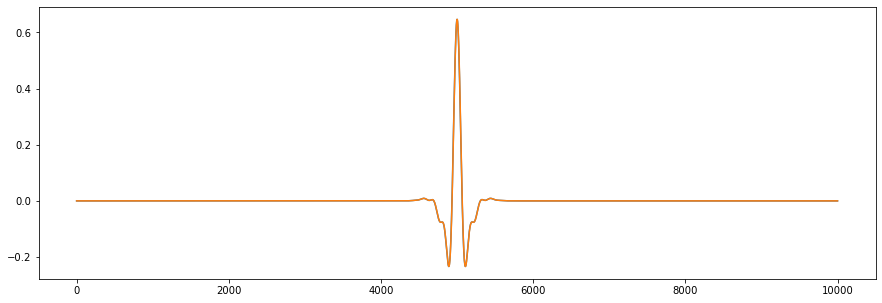

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

x = np.linspace(-10, 10, 10000)
y = np.exp(-x**2 / 0.01)

samplingfrequency = 1.0 / (x[2] - x[1])

numtaps = 800
b0F = signal.firwin(numtaps, np.array([0.5, 4]) / (samplingfrequency / 2.0), pass_zero = False)
a0F = [1.0]

Y = signal.filtfilt(b0F, a0F, y)
#this is exactly the same as convolving b0F with y twice 
Y1 = np.convolve(b0F, y, 'same')
Y1 = np.convolve(b0F, Y1, 'same')
#Y1=Y1[0:len(y)]

[y1, y1r] = signal.deconvolve(Y1, b0F[312:487])

plt.figure(figsize = (15, 5))
#plt.plot(y)
plt.plot(Y)
plt.plot(Y1)
plt.show()